### Импорт библиотек

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
# функция для графического представления матрицы несоответствия
def plot_confusion_matrix(y_true, y_pred, classes, normalize = False, cmap = plt.cm.Blues):
    """
    Функция выводит и строит матрицу несоответствий
    """

    # Вычисление матрицы несоответствий
    cm = metrics.confusion_matrix(y_true, y_pred)
    print('Confusion matrix:\n', cm)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    fig, ax = plt.subplots()
    plt.title(title)
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.figure.colorbar(im, ax = ax)
    # We want to show all ticks...
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation = 45, ha = 'right',
             rotation_mode = 'anchor')

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha = 'center', va = 'center',
                    color = 'white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    plt.show()
    #return cm

### Загрузка данных

In [6]:
data_test = pd.read_csv(r'../test_dataset.csv',
                   sep = ',', index_col = 'filename')  
data_test.head()

,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,mfcc_mean10,...,logfbank_std20,logfbank_std21,logfbank_std22,logfbank_std23,logfbank_std24,logfbank_std25,logfbank_std26,energy,zcr,label
filename,,,,,,,,,,,,,,,,,,,,,
ID01_hc_0_0_0_S (mp3cut.net).wav_fragment_0.wav,15.330946,-8.740301,10.472188,3.395539,-5.162852,-6.987804,-16.375539,-1.651024,-15.645575,-9.015319,...,3.145423,3.074468,3.042502,2.496285,2.414012,2.463708,2.004587,3960.302681,0.383755,0
ID05_hc_0_0_0_S (mp3cut.net).wav_fragment_0.wav,15.104125,-5.829941,5.764994,-4.637445,-0.957428,2.778685,-8.635162,-7.882842,-11.950063,-18.726913,...,3.007224,2.967000,2.633646,2.030350,1.970558,2.299575,2.006747,3643.573149,0.330712,0
ID05_hc_0_0_0_S (mp3cut.net).wav_fragment_1.wav,16.036852,-6.188327,5.224450,-4.517371,0.280730,1.681392,-9.939149,-15.974726,-9.472397,-15.455375,...,2.557527,2.438457,2.252246,1.964424,1.843730,2.009702,1.881945,3647.488082,0.390721,0
ID05_hc_0_0_0_S (mp3cut.net).wav_fragment_10.wav,15.714227,-6.503480,3.803119,-9.394088,-4.173789,-1.836479,-11.457876,-4.653593,-10.288290,-12.616486,...,2.676273,2.522489,2.265982,2.163699,2.096680,2.366275,2.234393,3326.373648,0.344009,0
ID05_hc_0_0_0_S (mp3cut.net).wav_fragment_11.wav,15.777004,-5.328012,2.321468,-8.439441,0.069581,1.109219,-9.837759,-12.122191,-16.100706,-14.561094,...,2.755002,2.884432,2.601980,2.197466,2.242392,2.687278,2.447983,3693.493180,0.347093,0


In [7]:
data_train = pd.read_csv(r'../train_dataset.csv',
                   sep = ',', index_col = 'filename')  
data_train.head()

,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,mfcc_mean10,...,logfbank_std20,logfbank_std21,logfbank_std22,logfbank_std23,logfbank_std24,logfbank_std25,logfbank_std26,energy,zcr,label
filename,,,,,,,,,,,,,,,,,,,,,
echo_ID00_hc_0_0_0 (mp3cut.net) (1).wav_fragment_0.wav,17.930628,-9.017882,14.054700,15.173825,1.868202,-1.469046,-24.847416,-15.100344,-3.971270,-3.789530,...,2.811926,2.521471,2.187658,1.765074,1.553108,1.589234,1.563839,3629.551152,0.487782,0
echo_ID00_hc_0_0_0 (mp3cut.net) (1).wav_fragment_1.wav,17.388777,-2.557132,11.618086,6.532841,5.911298,-6.027543,-29.458040,-19.564650,-6.468596,-1.780942,...,1.888350,1.772733,1.348724,1.046690,1.041594,1.282177,1.218821,3832.198043,0.468653,0
echo_ID00_hc_0_0_0 (mp3cut.net) (1).wav_fragment_10.wav,17.200156,-7.551741,11.922425,11.411635,6.540767,-0.632196,-24.284989,-14.447761,-4.743521,-2.466706,...,2.557428,2.261702,1.886688,1.568230,1.277807,1.386555,1.179126,3416.924168,0.475823,0
echo_ID00_hc_0_0_0 (mp3cut.net) (1).wav_fragment_11.wav,17.838119,-14.449631,12.278689,15.089007,3.997534,1.849043,-23.963366,-14.876950,-6.487395,-3.932320,...,2.849085,2.687413,2.324717,1.982102,1.747877,1.657400,1.404249,3624.880107,0.480463,0
echo_ID00_hc_0_0_0 (mp3cut.net) (1).wav_fragment_12.wav,18.105365,-12.996685,6.261352,4.386298,3.908244,-0.463887,-23.817368,-12.659750,-5.793961,-0.345014,...,2.525117,2.503312,2.225229,1.982468,1.788182,1.662781,1.444513,3742.625706,0.485129,0


In [8]:
data_train['label'].value_counts()

label
0    6050
1    4246
Name: count, dtype: int64

In [14]:
data_train['label'].value_counts(normalize = True)

label
0    0.587607
1    0.412393
Name: proportion, dtype: float64

In [9]:
data_test['label'].value_counts()

label
0    183
1    140
Name: count, dtype: int64

In [15]:
data_test['label'].value_counts(normalize = True)

label
0    0.566563
1    0.433437
Name: proportion, dtype: float64

### Деление данных на train и test

In [10]:
# Создание заголовка для файла CSV.
num_filters = 26
header = ['filename']
header.extend([f'mfcc_mean{i}' for i in range(1, num_filters + 1)])
header.extend([f'delta_mfcc{i}' for i in range(1, num_filters + 1)])
header.extend([f'delta2_mfcc{i}' for i in range(1, num_filters + 1)])
header.extend([f'logfbank{i}' for i in range(1, 27)])

header.extend([f'mfcc_std{i}' for i in range(1, num_filters + 1)])
header.extend([f'delta_std{i}' for i in range(1, num_filters + 1)])
header.extend([f'delta2_std{i}' for i in range(1, num_filters + 1)])
header.extend([f'logfbank_std{i}' for i in range(1, 27)])

header.extend(['energy', 'zcr', 'label'])

In [11]:
y_train = data_train['label'].values

data_header = header[1:-1]
X_train = data_train[data_header]

In [16]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train[0:2]

array([[ 0.97910825,  0.69722902,  1.28690557,  1.75967126,  0.10948993,
        -0.68915163, -2.30066959, -1.46688361,  0.70796374,  0.3500346 ,
         0.20808685, -0.05792966,  0.27925509, -0.67792612,  0.04370339,
        -1.64126266,  0.11385081,  0.25002011, -0.34079743, -1.33521557,
         0.48774633, -0.72154306, -0.52820746, -0.02046362,  0.30816764,
         1.24423626,  1.60679823,  0.54357433, -1.62758373,  0.46738726,
         1.02037549,  0.07112228, -1.19030461, -1.66341981,  0.91979398,
        -0.34125794,  0.68894377, -0.45712768, -1.1466879 , -0.58301568,
         2.070752  , -0.24630936, -1.46832753,  1.04648944, -2.24242081,
         0.42881583,  0.60832792,  0.19663289, -0.60529035,  0.20897012,
        -0.69867795,  0.47803342, -0.3687374 ,  0.43505809,  0.47630256,
        -0.0874623 ,  0.0797169 ,  0.02786536,  0.25595497, -1.25489515,
        -0.45245739,  0.49567218,  0.04090979,  0.27631863,  0.94384049,
         0.79958897,  0.82710367, -0.68131411, -0.2

In [17]:
y_test = data_test['label'].values
X_test = data_test[data_header]

In [18]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:2]

array([[-1.55374844e+00,  7.48564640e-01,  1.18990477e-01,
        -2.38938105e-01, -1.11359427e+00, -2.40313526e+00,
        -1.64651221e+00,  7.49661198e-01, -1.02305021e+00,
        -5.52553659e-01, -3.18482081e-01, -1.25510010e+00,
        -2.22373646e-01,  1.71651628e-01, -1.74128236e-01,
        -1.26103931e+00, -5.58005738e-01,  3.48258524e-01,
        -2.27643347e-01, -1.24836562e+00,  2.63157570e-01,
        -1.04508460e+00, -1.66824747e-01,  7.12787119e-01,
         2.13419133e-01, -5.87614997e-02, -5.30893477e-01,
         1.54015128e+00,  2.98696083e+00,  4.85922155e-01,
        -2.45052479e-01, -2.04603313e-01, -5.66073374e-02,
         5.31897105e-01, -5.21106227e-01, -8.62314762e-01,
        -6.16609658e-01, -3.84896472e-01, -1.31557391e+00,
         7.55841835e-01,  5.04833375e-01, -1.99122900e+00,
        -2.65852618e-01, -3.64914766e-01,  5.06359653e-01,
        -9.17594006e-01, -6.54485189e-01, -1.05009022e+00,
        -6.55680319e-01,  8.44760644e-01,  4.29099198e+0

In [19]:
# размер тренировочных и тестовых наборов (количество строк, колонок):
print ('Train set:', X_train.shape, y_train.shape)    
print ('Test set:', X_test.shape, y_test.shape)

Train set: (10296, 210) (10296,)
Test set: (323, 210) (323,)


### Классификатор на основе логистической регрессии

In [20]:
# создаем объект класса и обучаем модель
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = lr.predict(X_test)
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Confusion matrix:
 [[180   3]
 [ 18 122]]


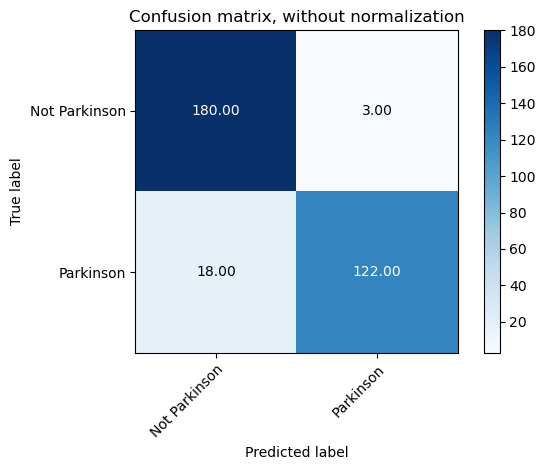

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       183
           1       0.98      0.87      0.92       140

    accuracy                           0.93       323
   macro avg       0.94      0.93      0.93       323
weighted avg       0.94      0.93      0.93       323



In [21]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

In [24]:
# Расчет чувствительности и специфичности модели
TN = metrics.confusion_matrix(y_test, y_pred)[0][0]
TP = metrics.confusion_matrix(y_test, y_pred)[1][1]
FN = metrics.confusion_matrix(y_test, y_pred)[1][0]
FP = metrics.confusion_matrix(y_test, y_pred)[0][1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print('Чувствительность:\t', sensitivity)
print('Специфичность:\t', specificity)

Чувствительность:	 0.8714285714285714
Специфичность:	 0.9836065573770492


### Классификатор k-NN

In [35]:
# выберем с помощью GridSearchCV наилучший параметр n_neigbours
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 10))}

# создадим объект класса и обучим модель на каждом наборе параметров
grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

print('Наилучшее число соседей: ', grid_search.best_params_)

Наилучшее число соседей:  {'n_neighbors': 1}


In [36]:
# создаем объект класса и обучаем модель. n_neighbors = 3 и 5 почти такой же результат 
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = knn.predict(X_test)
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Confusion matrix:
 [[182   1]
 [ 17 123]]


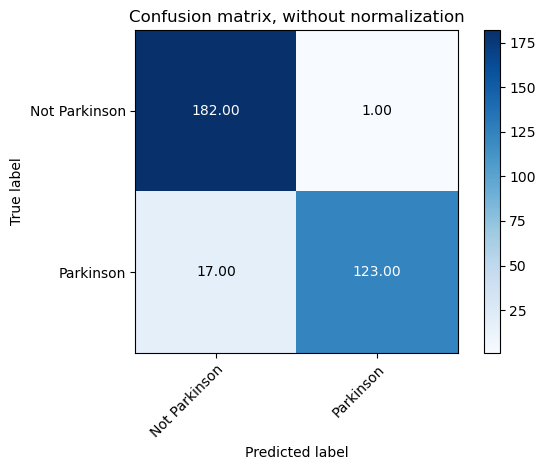

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       183
           1       0.99      0.88      0.93       140

    accuracy                           0.94       323
   macro avg       0.95      0.94      0.94       323
weighted avg       0.95      0.94      0.94       323



In [37]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

In [38]:
# Расчет чувствительности и специфичности модели
TN = metrics.confusion_matrix(y_test, y_pred)[0][0]
TP = metrics.confusion_matrix(y_test, y_pred)[1][1]
FN = metrics.confusion_matrix(y_test, y_pred)[1][0]
FP = metrics.confusion_matrix(y_test, y_pred)[0][1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print('Чувствительность:\t', sensitivity)
print('Специфичность:\t', specificity)

Чувствительность:	 0.8785714285714286
Специфичность:	 0.994535519125683


### Классификатор на основе SVM

In [39]:
# выберем с помощью GridSearchCV наилучшие параметры классификатора
svm = SVC()

param_grid = {
    'C': list(np.arange(0.1, 1, 0.1)), # параметр регуляризации
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # ядро классификатора
    'degree': list(range(2, 5)), # степень для полиноминального ядра
    #'gamma': [0.1, 1, 10], # коэффициент ядра
}

# создадим объект класса и обучим модель на каждом наборе параметров
grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=2)
grid_search.fit(X_train, y_train)

print('Лучшие параметры: ', grid_search.best_params_)

Лучшие параметры:  {'C': 0.30000000000000004, 'degree': 2, 'kernel': 'linear'}


In [40]:
# создаем объект класса и обучаем модель C = 0.3, kernel = 'linear'
svm = SVC(C = 0.3, kernel = 'linear')
svm.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = svm.predict(X_test)
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Confusion matrix:
 [[181   2]
 [ 18 122]]


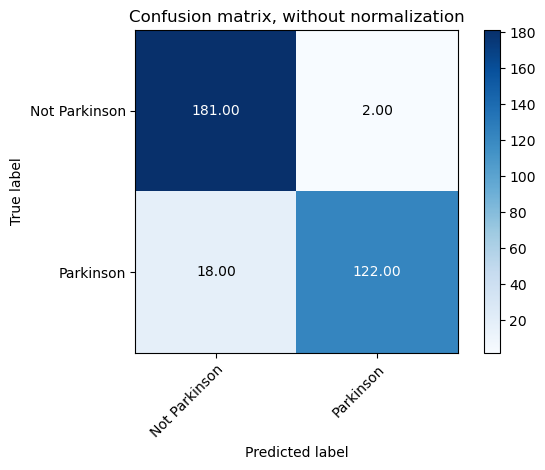

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       183
           1       0.98      0.87      0.92       140

    accuracy                           0.94       323
   macro avg       0.95      0.93      0.94       323
weighted avg       0.94      0.94      0.94       323



In [41]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

In [42]:
# Расчет чувствительности и специфичности модели
TN = metrics.confusion_matrix(y_test, y_pred)[0][0]
TP = metrics.confusion_matrix(y_test, y_pred)[1][1]
FN = metrics.confusion_matrix(y_test, y_pred)[1][0]
FP = metrics.confusion_matrix(y_test, y_pred)[0][1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print('Чувствительность:\t', sensitivity)
print('Специфичность:\t', specificity)

Чувствительность:	 0.8714285714285714
Специфичность:	 0.9890710382513661


### Классификатор Random Forest

In [43]:
# выберем с помощью GridSearchCV наилучшие параметры классификатора
rfc = RandomForestClassifier(random_state=17)

param_grid = {
    'max_depth': list(range(2,10)),
    'max_features': list(range(1,8)),
    'min_samples_leaf': list(range (1,11)),
    'n_estimators': list(range(2,10))
            }

# создадим объект класса и обучим модель на каждом наборе параметров
grid_search = GridSearchCV(rfc, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

print('Лучшие параметры: ', grid_search.best_params_)

Лучшие параметры:  {'max_depth': 9, 'max_features': 7, 'min_samples_leaf': 5, 'n_estimators': 9}


In [44]:
# создаем объект класса и обучаем модель n_estimators=1(2), max_depth=2, max_features=3
rfc = RandomForestClassifier(n_estimators=9, max_depth=9, min_samples_leaf=5, max_features=7, random_state=17)
rfc.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = rfc.predict(X_test)
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Confusion matrix:
 [[182   1]
 [ 34 106]]


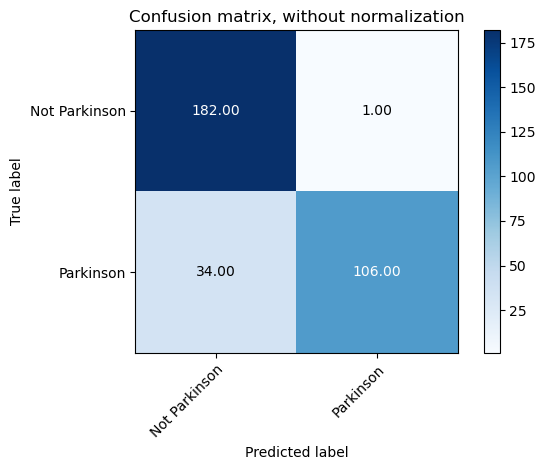

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       183
           1       0.99      0.76      0.86       140

    accuracy                           0.89       323
   macro avg       0.92      0.88      0.89       323
weighted avg       0.91      0.89      0.89       323



In [45]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

In [46]:
# Расчет чувствительности и специфичности модели
TN = metrics.confusion_matrix(y_test, y_pred)[0][0]
TP = metrics.confusion_matrix(y_test, y_pred)[1][1]
FN = metrics.confusion_matrix(y_test, y_pred)[1][0]
FP = metrics.confusion_matrix(y_test, y_pred)[0][1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print('Чувствительность:\t', sensitivity)
print('Специфичность:\t', specificity)

Чувствительность:	 0.7571428571428571
Специфичность:	 0.994535519125683


### Классификатор Дерево решений

In [47]:
# выберем с помощью GridSearchCV наилучшие параметры классификатора
tdc = tree.DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': range (2,11),
    'min_samples_leaf': range (1,11),
    'max_features': range (1,9)
             }

# создадим объект класса и обучим модель на каждом наборе параметров
grid_search = GridSearchCV(tdc, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

print('Лучшие параметры: ', grid_search.best_params_)

Лучшие параметры:  {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 2}


In [48]:
# создаем объект класса и обучаем модель
tdc = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, max_features=8, random_state=42)
tdc.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = tdc.predict(X_test)
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Confusion matrix:
 [[160  23]
 [ 44  96]]


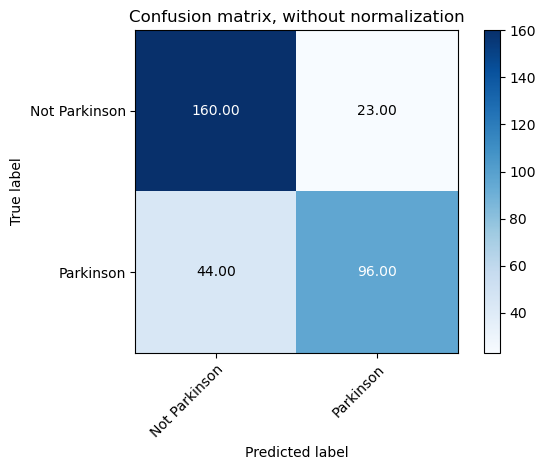

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       183
           1       0.81      0.69      0.74       140

    accuracy                           0.79       323
   macro avg       0.80      0.78      0.78       323
weighted avg       0.79      0.79      0.79       323



In [49]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

In [50]:
# Расчет чувствительности и специфичности модели
TN = metrics.confusion_matrix(y_test, y_pred)[0][0]
TP = metrics.confusion_matrix(y_test, y_pred)[1][1]
FN = metrics.confusion_matrix(y_test, y_pred)[1][0]
FP = metrics.confusion_matrix(y_test, y_pred)[0][1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print('Чувствительность:\t', sensitivity)
print('Специфичность:\t', specificity)

Чувствительность:	 0.6857142857142857
Специфичность:	 0.8743169398907104


### Классификатор на основе LDA

In [51]:
# создаем объект класса и обучаем модель
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = lda.predict(X_test)
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Confusion matrix:
 [[182   1]
 [ 19 121]]


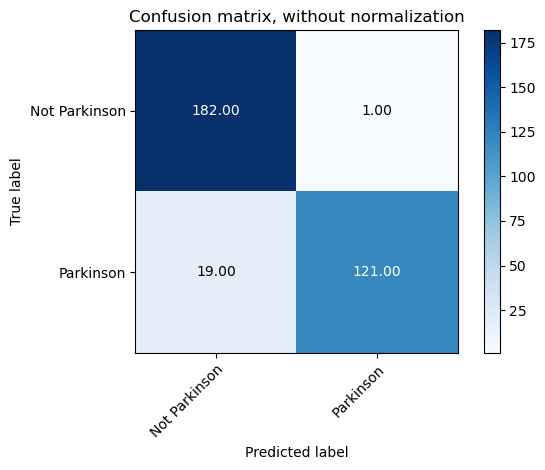

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       183
           1       0.99      0.86      0.92       140

    accuracy                           0.94       323
   macro avg       0.95      0.93      0.94       323
weighted avg       0.94      0.94      0.94       323



In [52]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

In [53]:
# Расчет чувствительности и специфичности модели
TN = metrics.confusion_matrix(y_test, y_pred)[0][0]
TP = metrics.confusion_matrix(y_test, y_pred)[1][1]
FN = metrics.confusion_matrix(y_test, y_pred)[1][0]
FP = metrics.confusion_matrix(y_test, y_pred)[0][1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print('Чувствительность:\t', sensitivity)
print('Специфичность:\t', specificity)

Чувствительность:	 0.8642857142857143
Специфичность:	 0.994535519125683


### Байесовский классификатор

In [54]:
# создаем объект класса и обучаем модель
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# делаем предикты для тестовой выборки
y_pred = gnb.predict(X_test)
y_pred[0:10]

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

Confusion matrix:
 [[153  30]
 [ 45  95]]


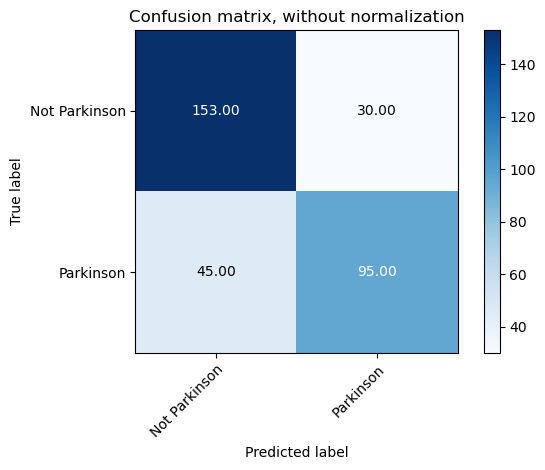

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       183
           1       0.76      0.68      0.72       140

    accuracy                           0.77       323
   macro avg       0.77      0.76      0.76       323
weighted avg       0.77      0.77      0.77       323



In [55]:
# строим матрицу несоответствий
plot_confusion_matrix(y_test, y_pred, classes=['Not Parkinson', 'Parkinson'], normalize = False)
# рассчет метрик классификации
print(metrics.classification_report(y_test, y_pred))

In [56]:
# Расчет чувствительности и специфичности модели
TN = metrics.confusion_matrix(y_test, y_pred)[0][0]
TP = metrics.confusion_matrix(y_test, y_pred)[1][1]
FN = metrics.confusion_matrix(y_test, y_pred)[1][0]
FP = metrics.confusion_matrix(y_test, y_pred)[0][1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print('Чувствительность:\t', sensitivity)
print('Специфичность:\t', specificity)

Чувствительность:	 0.6785714285714286
Специфичность:	 0.8360655737704918
